In [1]:
from IPython.display import Image, display, Markdown

from control import matlab as ml  # Python Control Systems Toolbox (compatibility with MATLAB)
import numpy as np              # Package to manipulate array and matrix
import matplotlib.pyplot as plt # Package to create figures and plots
import math # Package to be able to do some mathematical operations
import ReguLabFct as rlf # Package useful for the laboratory of regulation of HELMo Gramme
from ipywidgets import interact, FloatSlider, HBox, FloatText # Funtions useful for adding interactivity in the generated figures
import control as ctrl

# Exercice Ep, Ev, tr5, D%,..

HBO =  
    1.6
------------
15 s^2 + 6 s

H_BF = 
       1.6
------------------
15 s^2 + 6 s + 1.6


 Les caractéristiques de performances typiques associées à sa réponse en boucle fermée sont :
wn = 0.327 rad/s et zeta = 0.612.

Ordre =  2 , class =  1


DCGain : 1.000498205750212
Overshoot : 8.719046337682501
Peak : 1.087732107917255
PeakTime : 12.165773623649907
RiseTime : 5.772006736263201
SettlingTime : 15.87560919202015
Premier pic: 1.088 à t = 12.211
Premier creux: 0.992 à t = 24.421
Amplitude du second dépassement (premier creux) en pourcentage: 0.769%


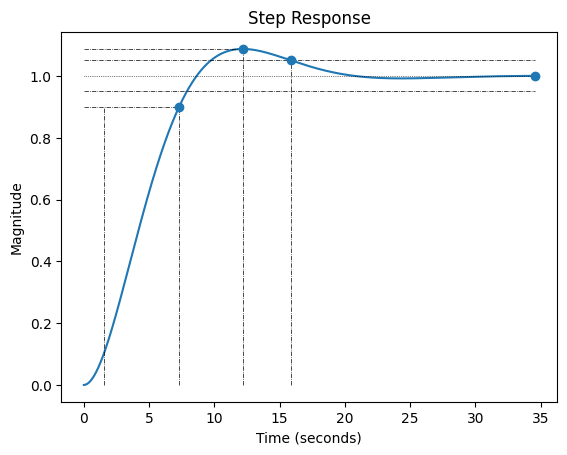

In [7]:
#num
termeScarreN=0;termeSN=0;TermeN=1.6
num = [termeScarreN,termeSN,TermeN]
#denom
termeScarreD=15;termeSD=6;TermeD=0
denom = [termeScarreD,termeSD,TermeD]

H_BO = ml.tf(num, denom)
print("HBO = ",H_BO)

# Calcul de la fonction de transfert en BF
H_BF = ml.feedback(H_BO)
print("H_BF =", H_BF)

wn, zeta, __ = ml.damp(H_BF, doprint=False)

print("\n Les caractéristiques de performances typiques associées à sa réponse en boucle fermée sont :") #exemple de print
print("wn = {:.3f} rad/s et zeta = {:.3f}.\n".format(wn[0], zeta[0]))
sysclass=rlf.getClass(H_BO)
order=rlf.getOrder(H_BO)
print("Ordre = ",order,", class = ",sysclass)

# Vérification du reste des caractéristiques
fig_step = rlf.step(H_BF,plot_infos=True)
t, y = ctrl.step_response(H_BF)
fig_step.show()
infos = rlf.stepWithInfo(H_BF)
rlf.printInfo(infos)
# Identification des dépassements
# Recherche des indices des maxima locaux
from scipy.signal import find_peaks

dc_gain = ctrl.dcgain(H_BF)
peaks, _ = find_peaks(y)
if len(peaks) == 0:
    print("Aucun pic trouvé.")
else:
    first_peak_index = peaks[0]
    first_peak_value = y[first_peak_index]

    # Recherche du premier creux après le premier pic
    troughs, _ = find_peaks(-y)
    subsequent_troughs = [trough for trough in troughs if trough > first_peak_index]
    
    if len(subsequent_troughs) == 0:
        print("Aucun creux trouvé après le premier pic.")
    else:
        first_trough_index = subsequent_troughs[0]
        first_trough_value = y[first_trough_index]
        
        # Calcul de l'amplitude en pourcentage du creux
        amplitude_second_overshoot_percent = abs(( first_trough_value- dc_gain) / dc_gain) * 100
        
        print(f"Premier pic: {first_peak_value:.3f} à t = {t[first_peak_index]:.3f}")
        print(f"Premier creux: {first_trough_value:.3f} à t = {t[first_trough_index]:.3f}")
        print(f"Amplitude du second dépassement (premier creux) en pourcentage: {amplitude_second_overshoot_percent:.3f}%")



Pour trouver $Z$ et $w_n$, il faut regarder le H_BF et diviser par le terme indépendant pour avoir +1.

Le gain KBO équivaut à la multiplication entre le numérateur C(s) et H(s) sous forme canonique --> ex : C=10/5s+1 et H=15/2s+1 --> KBO = 10*15=150

$G(s)=\frac{K}{1+\frac{2*Z}{w_n}*s+\frac{1}{w_n^2}*s^2}$             -->            Egale avec H_BF pour trouver $Z$ et $w_n$.

In [8]:

#####################A MODIF######################
Z= 0.244#zeta : trouvé via la formule canonique
k = 0.464 #nbr de dépassement
wn = 6.831
#KBO=0.8/3
#####################A MODIF######################

KBO = 13
#KBO=TermeN/TermeD

print("KBO = ",KBO)
KBF=KBO/(KBO+1)
print("KBF = ",KBF)

#Echelon : erreur si classe 0
Ep=1/(KBO+1)*100
print("Ep [%] si classe 0 = ",Ep)

#rampe : erreur si classe 1
Ev=1/KBO*100
print("Ev [%] si classe 1 = ",Ev)


#Dépassement : 

D=100*np.exp(-k*np.pi*Z/np.sqrt(1-Z**2))
Dabs = KBF-D*KBF/100 #D absolu
print ("D% [%] = ",D)
print("D absolu = ",Dabs)
T=k*np.pi/wn/np.sqrt(1-Z**2)
print("Tpeak k (s) = ",T)

print("H_BO =", H_BO)
print("H Bf = ",H_BF)

KBO =  13
KBF =  0.9285714285714286
Ep [%] si classe 0 =  7.142857142857142
Ev [%] si classe 1 =  7.6923076923076925
D% [%] =  69.29732311601214
D absolu =  0.2850962853513158
Tpeak k (s) =  0.2200454941508614
H_BO = 
    1.6
------------
15 s^2 + 6 s

H Bf =  
       1.6
------------------
15 s^2 + 6 s + 1.6



# Marge de phase et stabilité 

In [9]:
# Tracé du diagramme de Bode avec les marges de stabilité 
fig_bode = rlf.bode(H_BO, margins=True)    # Génère le diagramme de Bode avec les marges de stabilité et le stocke dans la variable `fig_bode`
fig_bode.show()

# Tracé du diagramme de Nichols avec les marges de stabilité 
fig_nichols = rlf.nichols(H_BO, margins=True)    # Génère le diagramme de Nichols avec les marges de stabilité  et le stocke dans la variable `fig_nichols`
fig_nichols.show()

Marge de gain infinie si ne coupe jamais l'axe des -180°.

### Erreur de vitesse graphes

e_v = 3.7500000000000284


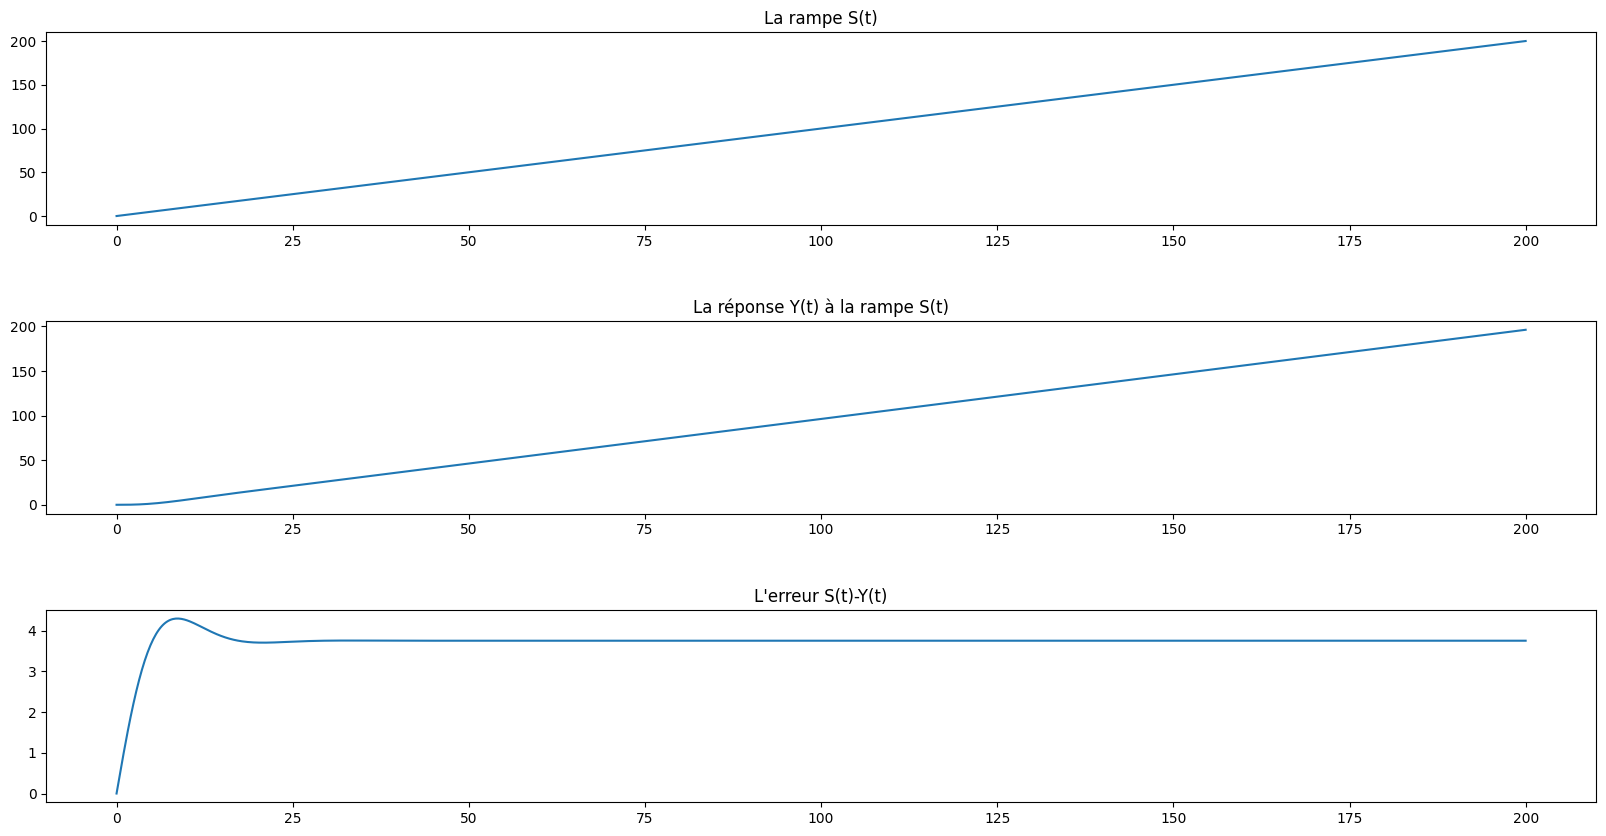

In [10]:
# Vérification de l'erreur de vitesse

# Génération du signal d'entrée de type rampe unitaire
t = np.linspace(0, 200, 1000)
s = t

# Simuler la réponse du système à la rampe de pente 1
[y, t, xout] = ml.lsim(H_BF,s,t)

# Affichage des graphes
plt.figure("Erreur de vitesse",figsize=(20,10))
plt.subplot(3,1,1); plt.plot(t,s); plt.title("La rampe S(t)")
plt.subplot(3,1,2); plt.plot(t,y); plt.title("La réponse Y(t) à la rampe S(t)")
plt.subplot(3,1,3); plt.plot(t,(s-y)); plt.title("L'erreur S(t)-Y(t)")
plt.subplots_adjust(hspace=0.5) # Pour laisser un peu d'espace pour les titres

# Impression de l'erreur de vitesse
print("e_v =", s[-1]-y[-1]) # L'élément "-1" d'une liste correspond au dernier de celle-ci

(array([-0.4+0.j,  0. +0.j]), array([], dtype=complex128))

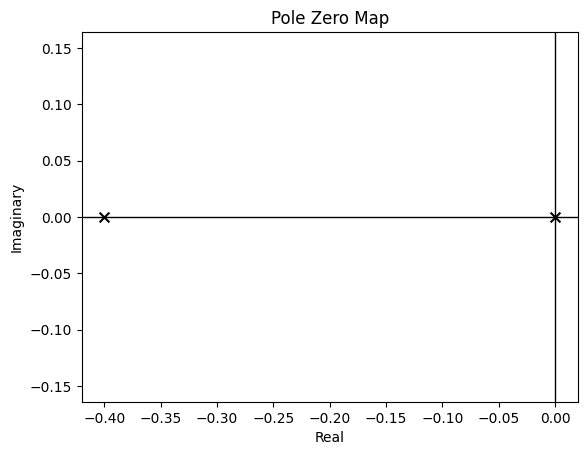

In [11]:
ml.pzmap(H_BO)